## CNN + LSTM Baseline
CNN 통해 시퀀스의 모든 이미지 flatten > LSTM에 공급 > 다대일 RNN >
10개의 유닛으로 이루어진 완전연결층(activation: softmax)

- convolutional layer : 커널 크기>5x5, 필터의 깊이>3
- loss : 교차 엔트로피
- Optimizer : Adam

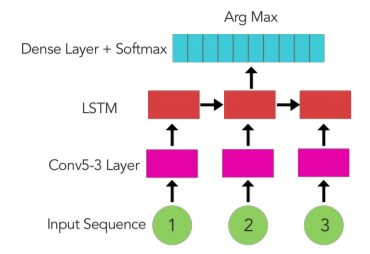

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
cnn = Sequential()
#######CNN#######
cnn.add(Conv2D(??, (5,5), padding='valid', activation='relu', input_shape=(??,??,3)))
cnn.add(Conv2D(??, (5,5), padding='same', activation='relu'))
cnn.add(Conv2D(??, (5,5), padding='same', activation='relu'))
#################
cnn.add(Flatten())

model = Sequential()
model.add(TimeDistributed(cnn))
######LSTM#######
model.add(LSTM(??, return_sequences = True))
model.add(LSTM(??, return_sequences = True))
model.add(LSTM(??, return_sequences = False))
#################
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Deep Layered CNN + LSTM
- CNN 레이어를 2개 더 추가
- LSTM을 양방향으로
- 모든 CNN layer 뒤에 dropout(0.2), batch normalization 추가
- 2x2 Max Pooling layers , strides=2
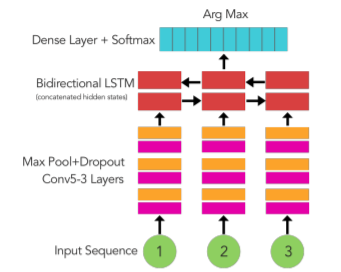

In [ ]:
cnn = Sequential()
#######CNN#######
cnn.add(Conv2D(??, (5, 5), padding='valid', activation='relu', input_shape=(??,??,3)))
cnn.add(MaxPooling2D((2,2), strides=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(Conv2D(??, (5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2), strides=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(Conv2D(??, (5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2), strides=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
#################
cnn.add(Flatten())

model = Sequential()
model.add(TimeDistributed(cnn))
######LSTM#######
model.add(Bidirectional(LSTM(??, return_sequences=True)))
model.add(Bidirectional(LSTM(??, return_sequences=True)))
model.add(Bidirectional(LSTM(??, return_sequences=False)))
#################
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## ImageNet Pretrained VGG-16 Features + LSTM
문장이 아닌 단어에 focus
- VGG 레이어의 마지막 층까지 병목현상 추출??
- 양방향 LSTM
- VGG 모델 가중치 동결, LSTM, Dense층 가중치 업데이트
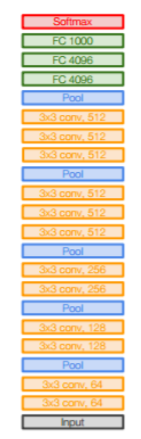

In [ ]:
from keras.applications.vgg16 import VGG16
"""
CNN = Sequential()
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(??,??,3)))
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2), strides=2))
cnn.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2), strides=2))
cnn.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2), strides=2))
cnn.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2), strides=2))
cnn.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2), strides=2))
cnn.add(Flatten())
"""
vgg = Sequential()
vgg.add(VGG16(weights='imagenet', include_top=False, input_shape=(??, ??, 3)))

model = Sequential()
model.add(TimeDistributed(cnn))
######LSTM#######
model.add(Bidirectional(LSTM(??, return_sequences=True)))
#################
model.add(Dense(4096, activation='softmax'))
model.add(Dense(4096, activation='softmax'))
model.add(Dense(1000, activation='softmax'))